https://efotw.org/economic-freedom/dataset?geozone=world&page=dataset&min-year=2&max-year=0&filter=0

In [5]:


import pandas as pd
from IPython.display import display, Markdown

In [11]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 5.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [7]:
!wget https://efotw.org/sites/all/modules/custom/ftw_maps_pages/files/efotw-2024-master-index-data-for-researchers-iso.xlsx

--2025-01-31 13:47:20--  https://efotw.org/sites/all/modules/custom/ftw_maps_pages/files/efotw-2024-master-index-data-for-researchers-iso.xlsx
Resolving efotw.org (efotw.org)... 2606:4700:3036::ac43:99f5, 2606:4700:3030::6815:cfb, 172.67.153.245, ...
Connecting to efotw.org (efotw.org)|2606:4700:3036::ac43:99f5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5058452 (4.8M) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘efotw-2024-master-index-data-for-researchers-iso.xlsx’

efotw-2024-master-i 100%[===================>]   4.82M  13.0MB/s    in 0.4s    

2025-01-31 13:47:20 (13.0 MB/s) - ‘efotw-2024-master-index-data-for-researchers-iso.xlsx’ saved [5058452/5058452]



In [12]:
xl_file = pd.ExcelFile("efotw-2024-master-index-data-for-researchers-iso.xlsx")

dfs = {sheet_name: xl_file.parse(sheet_name) 
          for sheet_name in xl_file.sheet_names}

In [14]:
len(dfs)

3

In [16]:
dfs.keys()

dict_keys(['EFW Data 2024 Report', 'EFW Panel Data 2024 Report', 'EFW Data 1950-1965'])

In [37]:
efw_data_2024 = dfs["EFW Data 2024 Report"]
efw_data_2024 = efw_data_2024.iloc[3:]
efw_data_2024.columns = efw_data_2024.iloc[0]
efw_data_2024 = efw_data_2024[1:]

In [34]:
efw_data_2024.drop(efw_data_2024.columns[0], axis=1)

In [41]:
efw_data_2024 = efw_data_2024.iloc[:, 1:]

In [46]:
efw_data_2024['Countries'].value_counts()

Countries
Albania          29
Algeria          29
Angola           29
Argentina        29
Armenia          29
                 ..
Venezuela, RB    29
Vietnam          29
Yemen, Rep.      29
Zambia           29
Zimbabwe         29
Name: count, Length: 165, dtype: int64

In [48]:
# Filter data for India
india_data = efw_data_2024[efw_data_2024['Countries'] == 'India']


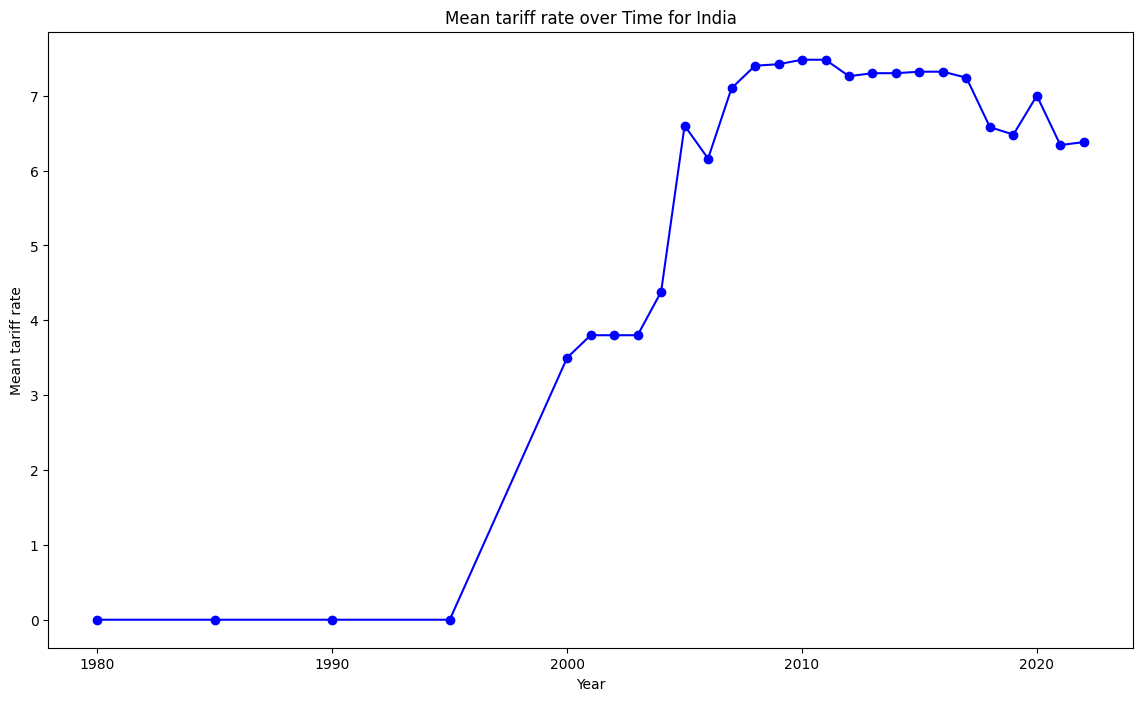

In [51]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(14, 8))

# Plot the time series data
plt.plot(india_data['Year'], india_data['Mean tariff rate'], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Mean tariff rate over Time for India')
plt.xlabel('Year')
plt.ylabel('Mean tariff rate')

# Display the plot
plt.show()


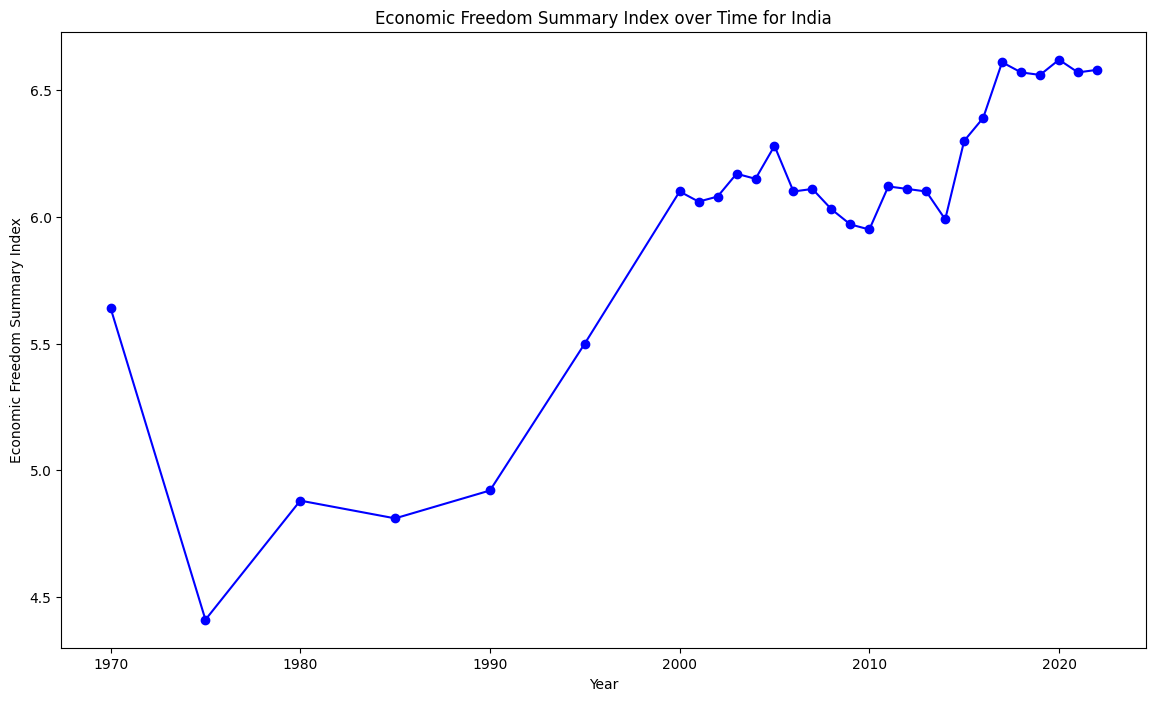

In [56]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Plot the time series data
plt.plot(india_data['Year'], india_data[' Economic Freedom Summary Index'], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Economic Freedom Summary Index over Time for India')
plt.xlabel('Year')
plt.ylabel('Economic Freedom Summary Index')

# Display the plot
plt.show()


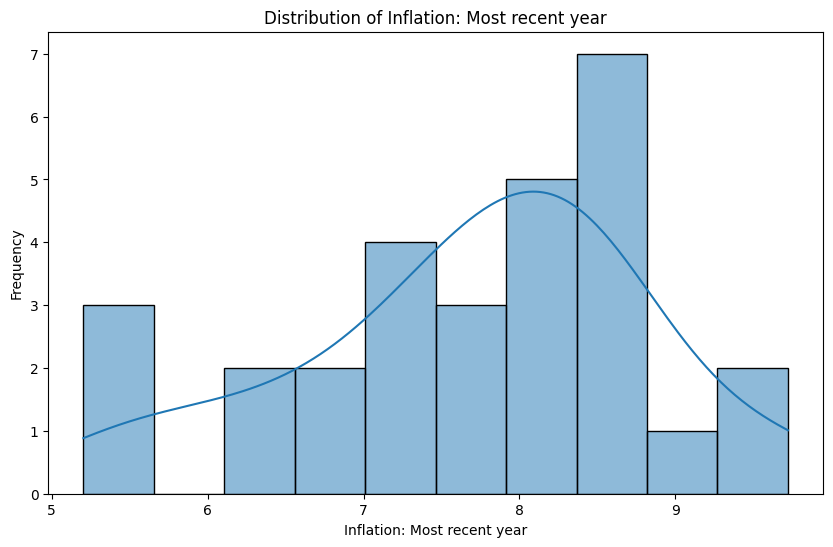

In [64]:
import seaborn as sns
# Distribution of Data Values
plt.figure(figsize=(10, 6))
sns.histplot(india_data['Inflation: Most recent year'], bins=10, kde=True)
plt.title('Distribution of Inflation: Most recent year')
plt.xlabel('Inflation: Most recent year')
plt.ylabel('Frequency')
plt.show()




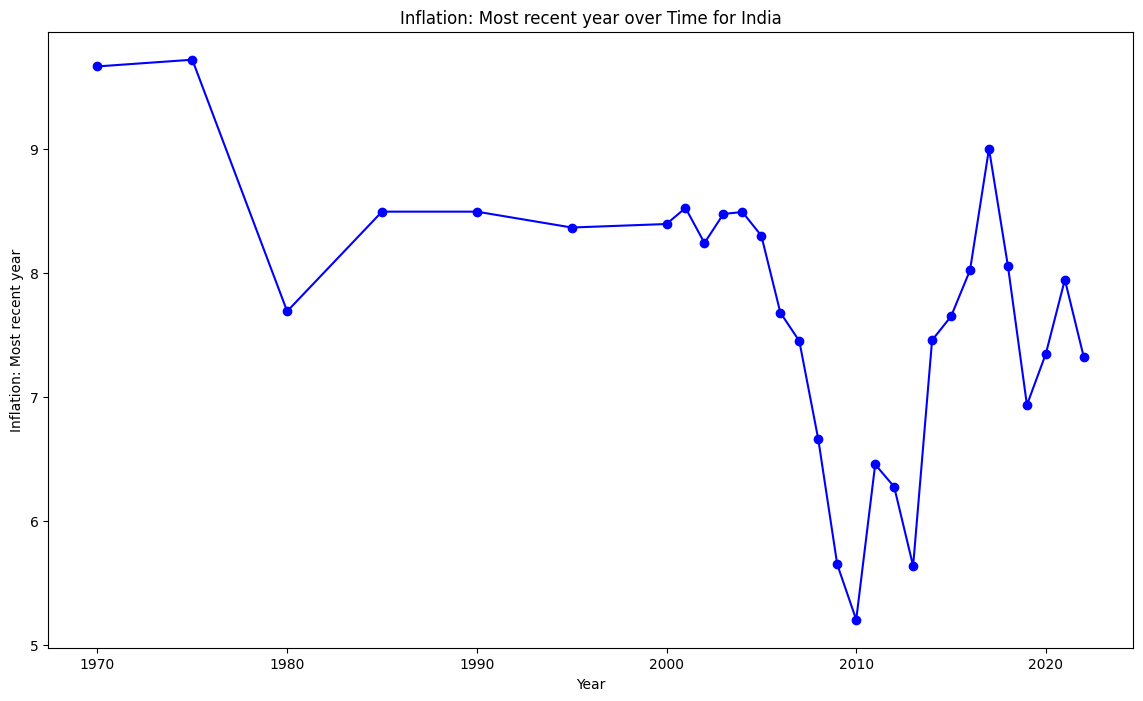

In [62]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Plot the time series data
plt.plot(india_data['Year'], india_data['Inflation: Most recent year'], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Inflation: Most recent year over Time for India')
plt.xlabel('Year')
plt.ylabel('Inflation: Most recent year')

# Display the plot
plt.show()

In [55]:
india_data.columns

Index(['Year', 'ISO Code 2', 'ISO Code 3', 'Countries',
       ' Economic Freedom Summary Index', 'Rank', 'Quartile',
       'Government consumption', 'data', 'Transfers and subsidies', 'data',
       'Government investment', 'data', 'Top marginal income tax rate', 'data',
       'Top marginal income and payroll tax rate', 'data',
       'Top marginal tax rate', 'State ownership of Assets',
       'Size of Government', 'Area 1 Rank', 'Judicial independence',
       'Impartial courts', 'Protection of property rights',
       'Military interference in rule of law and politics',
       'Integrity of the legal system', 'Legal enforcement of contracts',
       'Regulatory restrictions on the sale of real property',
       'Reliability of police', 'Gender Legal Rights Adjustment',
       'Legal System & Property Rights -- Without Gender Adjustment',
       'Legal System & Property Rights -- With Gender Adjustment',
       'Area 2 Rank', 'Money growth', 'data',
       'Standard deviation of i